In [1]:
from math import pi, sqrt, atan 
from numpy import linspace, shape, array
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import plot, show, savefig, ylim, xlim, grid, xlabel, ylabel,imshow

In [2]:
Q= 1#UA
e= 0.017
a= Q/(1+e) #UA
b= sqrt((1-(e*e))*(a*a)) #AU
q= 2*a - Q #UA
print(a,b,q,Q,e)

0.9832841691248771 0.9831420742953453 0.9665683382497543 1 0.017


In [3]:
def orbit(init, t):
    
    dx = init[0]
    dy = init[1]
    dth = init[4]
        
    GM = 4*pi*pi # UA^3 / yr^2
    r = sqrt(init[2]*init[2] + init[3]*init[3])
    ac = -GM / (r*r*r)

    dv_x = ac*init[2]
    dv_y = ac*init[3]
    
    dthe = (sqrt(((dv_x*dv_x)/((2/r)-(1/a))) + (dv_y*dv_y)/((2/r)-(1/b)))) 
    #print(dx,dy)
    return array([dv_x, dv_y, dx, dy, dthe], float)
 

In [4]:
t = linspace(0, 4, 201)

init = [0., 2.*pi, a, 0, 0]

sol,outodeint = odeint(orbit, init, t, full_output=True)

vxx, vyy, xx, yy, th = sol.T

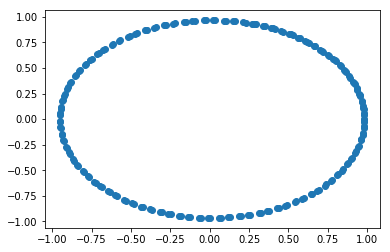

In [5]:
plt.plot(xx, yy, 'o')
#plt.ylim(-1,1)
#plt.xlim(-1,1)
GM= 4*pi*pi
r_pos = []
ener = []

for i in range(len(xx)):
    r_pos.append( sqrt(xx[i]*xx[i] + yy[i]*yy[i]) )
    ener.append( -GM / (2*a) )

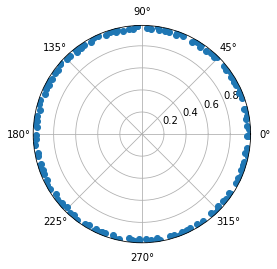

In [6]:
plt.polar(th,r_pos,'o')
plt.show()

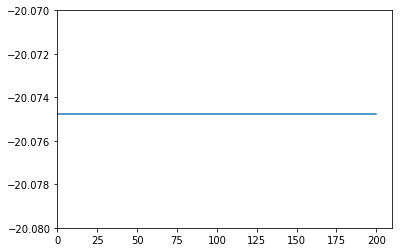

In [7]:
plt.plot(ener)
plt.ylim(-20.08, -20.07)
plt.xlim(0,210)
plt.show()